In [1]:
import numpy as np #Numerical Computation & storing the data in ndarray from as most machine 
import pandas as pd #Data Wrangling and/or Manipulation
import matplotlib.pyplot as plt  #data visulation

In [2]:
# using df variable for a dataframe placeholder
df = pd.read_csv("FuelConsumption.csv")
# lets have a look at the data
df.head() #it will show the first 5 rows of data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
#summary of data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf=df[["ENGINESIZE","CYLINDERS", "FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


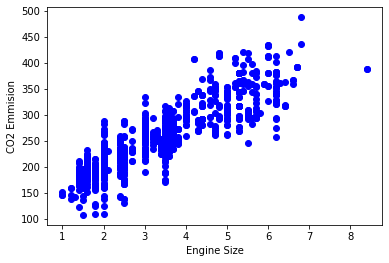

In [5]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color ="Blue")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emmision")
plt.show()

In [12]:
#Data Preprocessing 
#1. We have thee whole data | Split the data and keep some for testing

X = cdf[["ENGINESIZE"]]  # Independennt variables
y = cdf[["CO2EMISSIONS"]]# Labels/ Dependent Variables

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 3)

In [22]:
#2. We shall convert pandas data type to ndarry (numpy d dim array)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train= np.asarray(y_train)
y_test= np.asarray(y_test)

In [58]:
# Let's verify if the training independent varialbes as same as of labels
print("Training dataset size [Independent Variables]", X_train.shape)
print("Training dataset size [Dependent Variables]", y_train.shape)
print("------")
print("Testing dataset size [Independent Variables]", X_test.shape)
print("Testing dataset size [Dependent Variables]", y_test.shape)

Training dataset size [Independent Variables] (746, 1)
Training dataset size [Dependent Variables] (746, 1)
------
Testing dataset size [Independent Variables] (321, 1)
Testing dataset size [Dependent Variables] (321, 1)


In [29]:
# Let's import Regression model form linear models from sklearn 
from sklearn import linear_model
regressor = linear_model.LinearRegression() # Created an object of Linear regression

In [30]:
# Train the model (i.e, regression model). this is done by usning fit method in sklearn
regressor.fit(X_train,y_train)

LinearRegression()

In [40]:
# The Parameters / The Cooeficients i.ee, Slope(s) & Intercept 
#Simple LR : y = mx + c
#Multiple : y = m1*x1 + m2*x2 + m3*x3 + .... + m_n*x_n
#coeficients = m_i i= 1,2,3...,n
print(regressor.coef_)
print(regressor.coef_.shape)
print(regressor.coef_[0])
print(regressor.coef_[0][0])


[[39.46811192]]
(1, 1)
[39.46811192]
39.46811191707529


In [38]:
regressor.intercept_
print(regressor.intercept_)
print(regressor.intercept_.shape)
print(regressor.intercept_[0])

[123.50160745]
(1,)
123.5016074512157


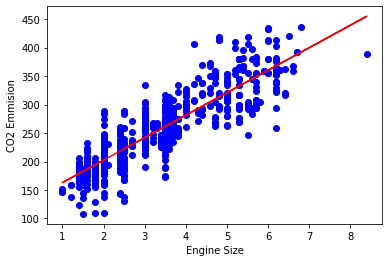

In [61]:
plt.scatter(X_train,y_train,color ="Blue")
plt.plot(X_train, regressor.coef_[0][0]*X_train + regressor.intercept_[0], color='red' )
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emmision")
plt.show()

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 

```
- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
```


In [43]:
# To calculate error what we need ?
# we have y , y_hat
# y_test is actual labels/ expected outputs / ground truth
# y_hat is predictions / observations from the model 
# We shall do it with testingg data

In [44]:
y_hat = regressor.predict(X_test)

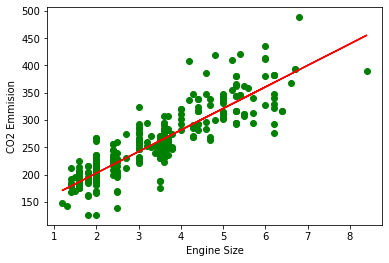

In [65]:
# plt.scatter(X_train,y_train,color ="blue")
plt.scatter(X_test,y_test,color ="green")
plt.plot(X_test, y_hat, color='red' )
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emmision")
plt.show()

In [50]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score # This is not error but equivalet to accuracy

In [66]:
print("Mean Absolute Error [Error in Model] : ", mean_absolute_error(y_test, y_hat))
print("Mean Squared Error [Error in Model] : ", mean_squared_error(y_test, y_hat))
print("--------------")
print("R2 Score [Accuracy of Model]: ", r2_score(y_test, y_hat)*100, "%")

Mean Absolute Error [Error in Model] :  21.901384314442712
Mean Squared Error [Error in Model] :  892.4979475936295
--------------
R2 Score [Accuracy of Model]:  76.7009455328147 %


In [55]:
print(f"Mean absolute error: {np.mean(np.absolute(y_hat - y_test))} ")#pred - actual

Mean absolute error: 21.901384314442712 


In [ ]:
for k, i, j in zip(X_test, y_test, y_hat):
  print(k, i,j)